<a href="https://colab.research.google.com/github/afnanrahman/EAFP/blob/OmerAndKevin/Kevin_Omer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages and Data

In [16]:
# Standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans

In [17]:
data_df = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_smote_data.csv")
data_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,attrition,rate_avg
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,1,6891.67
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,0,8415.67
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,1,1287.00
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,0,8202.33
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,0,5754.33


# Finding Optimal K

Obvious, as we have only 2 categories, but here is the code if you want to take a look

In [18]:
# Fitting K-means on certain values
# Storing sum of sqaured distance of samples to centroids in distance
distance = []
values = range(1,10)
for k in values:
    k_means = KMeans(n_clusters=k)
    k_means.fit(data_df)
    distance.append(k_means.inertia_)

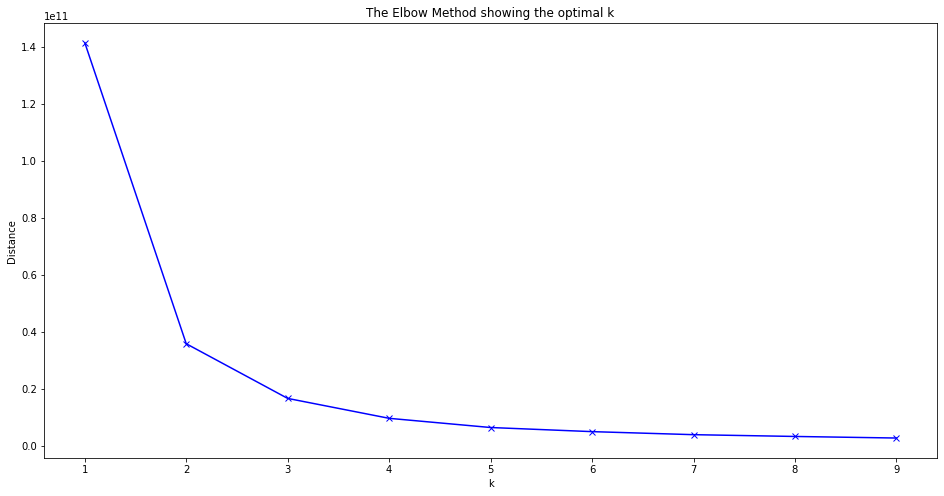

In [19]:
# Plotting Elbow Plot
plt.figure(figsize=(16,8))
plt.plot(values, distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Fitting 2-Means Model

In [20]:
k_means = KMeans(n_clusters=2)
k_means.fit(data_df)

KMeans(n_clusters=2)

**KMeans.inertia_** tells us the distance of the sum of the squared distance of samples to cluster centers, want to  **minimize** this number

In [21]:
k_means.inertia_

35885740721.52976

In [22]:
k_means.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [23]:
k_means.feature_names_in_

array(['age', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'employee_number', 'environment_satisfaction', 'gender',
       'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_rate',
       'num_companies_worked', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction',
       'stock_option_level', 'total_working_years',
       'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_with_curr_manager', 'attrition', 'rate_avg'], dtype=object)

# Improving Model

We only want to include features that maximizes our accuracies from our Sequential Forward/Backward Wrappers, so we drop the columns that don't help us

In [24]:
trimmed_data_df = data_df.drop(['daily_rate', 'department', 'education_field', 'gender',
       'hourly_rate', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike',
       'total_working_years', 'years_at_company', 'years_with_curr_manager',
       'attrition'], axis=1)
trimmed_data_df.head()

,age,business_travel,distance_from_home,education,employee_number,environment_satisfaction,job_involvement,job_level,job_role,job_satisfaction,marital_status,over_time,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_in_current_role,rate_avg
0,41,2,1,2,1,2,3,2,7,4,2,1,3,1,0,0,1,4,6891.67
1,49,1,8,1,2,3,2,2,6,2,1,0,4,4,1,3,3,7,8415.67
2,37,2,2,2,4,4,2,1,2,3,2,1,3,2,0,3,3,0,1287.00
3,33,1,3,4,5,4,3,1,6,3,1,1,3,3,0,3,3,7,8202.33
4,27,2,2,1,7,1,3,1,2,2,1,0,3,4,1,3,3,2,5754.33


In [25]:
k_means_trimmed_features = KMeans(n_clusters=2)
k_means_trimmed_features.fit(trimmed_data_df)
k_means_trimmed_features.inertia_

4222577263.8277016

In [26]:
k_means.inertia_/k_means_trimmed_features.inertia_

8.498539749394636

The distance of the sum of the squared distance of samples to cluster centers is about 8.5 times less than the K-means done on all the features, which means that we are doing much better than before